In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

In [9]:
df = pd.read_csv('.archive/list_attr_celeba.csv')
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [17]:
# -1의 개수가 좀 많다 => 평균
df[['Male', 'Smiling']].describe()

,Male,Smiling
count,202599.000000,202599.000000
mean,-0.166491,-0.035839
std,0.986045,0.999360
min,-1.000000,-1.000000
25%,-1.000000,-1.000000
50%,-1.000000,-1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [18]:
df[['Male', 'Smiling']].head()

,Male,Smiling
0,-1,1
1,-1,1
2,1,-1
3,-1,-1
4,-1,-1


### Male -1은 여자, 1은 남자

### Smiling -1은 무표정, 1은 웃음

### x, y값의 데이터셋을 제작함(npy 또는 npz로 제작)

### x, y값을 한개의 파일로 갖고다님 => npz 압축파일

In [46]:
i_id = df['image_id'][:1000]
Me = df['Male'][:1000]
Sg = df['Smiling'][:1000]
path = '.archive/img_align_celeba/img_align_celeba/'

X, y = [], []
for _id, _male, _smiling in zip(i_id, Me, Sg):
    img = Image.open(path + _id)
    img.resize((178, 218))
    arr = np.array(img)

    X.append(arr)
    y.append([(_male + 1) // 2, (_smiling + 1) // 2])

In [42]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

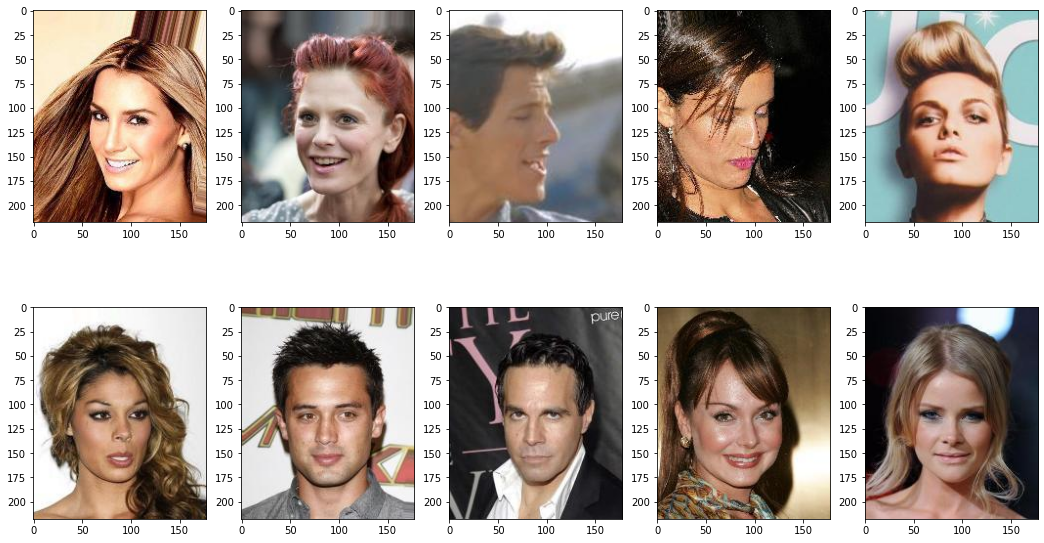

In [47]:
plt.figure(figsize=(18, 10))

for i, x in enumerate(X[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x)

plt.show()

In [49]:
# celeb.npz로 저장
print(np.shape(X), np.shape(y))
np.savez('celeb.npz', x=X, y=y)

(1000, 218, 178, 3) (1000, 2)


In [ ]:
# json으로 만들어보기
my_json = {{
    'meta': {
        'row': 2000,
        'col': 2
    },
    'img_info': [{
        'id': df['image_id'][0],
        'class': {
            'male': df['Male'][0],
            'sm': df['Smiling'][0]
        }
    }]
}}